<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта-&quot;Рынок-заведений-общественного-питания-Москвы&quot;" data-toc-modified-id="Описание-проекта-&quot;Рынок-заведений-общественного-питания-Москвы&quot;-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Описание проекта "Рынок заведений общественного питания Москвы"</a></span></li><li><span><a href="#Подготовка-данных-к-анализу" data-toc-modified-id="Подготовка-данных-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных к анализу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Виды-объектов-общественного-питания" data-toc-modified-id="Виды-объектов-общественного-питания-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Виды объектов общественного питания</a></span></li><li><span><a href="#Количество-сетевых-и-несетевых-заведений" data-toc-modified-id="Количество-сетевых-и-несетевых-заведений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Количество сетевых и несетевых заведений</a></span></li><li><span><a href="#Сетевые-заведения" data-toc-modified-id="Сетевые-заведения-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Сетевые заведения</a></span></li><li><span><a href="#Среднее-количество-посадочных-мест" data-toc-modified-id="Среднее-количество-посадочных-мест-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Среднее количество посадочных мест</a></span></li><li><span><a href="#Адреса" data-toc-modified-id="Адреса-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Адреса</a></span></li><li><span><a href="#Топ-10-улиц-по-количеству-объектов-общественного-питания" data-toc-modified-id="Топ-10-улиц-по-количеству-объектов-общественного-питания-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Топ-10 улиц по количеству объектов общественного питания</a></span></li><li><span><a href="#Районы-Москвы-с-малым-количеством-заведений" data-toc-modified-id="Районы-Москвы-с-малым-количеством-заведений-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Районы Москвы с малым количеством заведений</a></span></li><li><span><a href="#Распределение-количества-посадочных-мест" data-toc-modified-id="Распределение-количества-посадочных-мест-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Распределение количества посадочных мест</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Презентация" data-toc-modified-id="Презентация-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Презентация</a></span></li></ul></div>

# Описание проекта "Рынок заведений общественного питания Москвы"

Планируется открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой, поэтому необходима помощь ивесторов. Их интересует текущее положение дел на рынке. 

**Задача**: проанализировать открытые данные о заведениях общественного питания в москве и ответить на вопрос, будет ли популярно такое кафе на рынке.

**Описание данных**

Таблица rest_data:
* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.

# Подготовка данных к анализу

Сначала откроем данные и изучим их. Проверим на явные пропуски и наличие дубликатов.

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# открываем файл 
rest_data = pd.read_csv('/datasets/rest_data.csv')
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
# смотрим общую информацию о данных
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


У столбцов верные типы данных, но я бы добавила столбец с информацией о сети булевого типа. Там будет храниться значение True, если это сеть, а иначе - False.

In [4]:
# создаем новый булевый столбец
rest_data['is_chain'] = rest_data['chain'] == 'да'
rest_data.head()

,id,object_name,chain,object_type,address,number,is_chain
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,False
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,False
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,False
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,True
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,False


Можно было бы посмотреть, есть ли разные написания одних и тех же сетевых заведений (например, в разном регистре). Но таких заведений много, а просматривать их в ручную не вижу смысла. Также пока не вижу смысла переименовывать их или приводить к одному виду. Ведь адреса у них разные. Пока мы будем рассматривать такие заведения как отдельно взятые. Если в ходе анализа мне понадобится разделять данные по рестроранным сетям и такие повторы будут искажать результаты анализа, то я вернусь к этому вопросу.

Проверим уникальные значения с типах заведений, нет ли там какого-то неопределённого типа.

In [5]:
# уникальные значения типов заведений
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Никаких неопределённых типов заведений нет. Теперь проверим сколько где поадочных мест.

In [6]:
# количество заведений с определённым количеством мест
rest_data['number'].value_counts().head()

0     1621
40     835
20     727
30     685
10     644
Name: number, dtype: int64

1621 заведение без посадочных мест. Это возможно, если это отдел кулинарии магазина или другое маленькое заведение. Например, в кофейнях, где продают кофе навынос, часто нет посадочных мест. 

In [7]:
# проверка на дубликаты
rest_data.duplicated().sum()

0

## Вывод 
Явных пропусков в данных нет. В столбце с количеством посадочных мест нельзя точно сказать, есть ли там пропуски или нет, поскольку в заведениях могут отсутствовать посадочные места. Полных дубликатов нет. Столбцы названы корректно. Можно приступать к анализу данных. 

In [37]:
#
def main_info(data):
    return data.info(), data.describe()

In [38]:
#
main_info(rest_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
 6   is_chain     15366 non-null  bool  
 7   streetname   15366 non-null  object
dtypes: bool(1), int64(2), object(5)
memory usage: 855.5+ KB


(None,
                   id        number
 count   15366.000000  15366.000000
 mean   119720.066901     59.547182
 std     73036.130732     74.736833
 min       838.000000      0.000000
 25%     28524.000000     12.000000
 50%    144974.500000     40.000000
 75%    184262.250000     80.000000
 max    223439.000000   1700.000000)

# Анализ данных

Преобразуем названия некоторых типов заведений, чтобы они лучше отражались на графике. Новые названия: ПБО (предприятие быстрого обслуживания) и магазин (ОК) - отдел кулинарии.

In [9]:
# переименовываем длинные названия типов заведений
rest_data['object_type'].replace({'предприятие быстрого обслуживания': 'ПБО*', 
                                  'магазин (отдел кулинарии)': 'магазин (ОК**)'},
                                inplace=True)

Построим вспомогательную сводную таблицу с информацией о количестве всех заведений, сетевых заведений и их доле на рынке по типам. 

In [10]:
# сводная таблица по типам заведений
pivot_rest = rest_data.pivot_table(index='object_type',
                                   values='is_chain', 
                                   aggfunc=['count', 'sum', 'mean'])
# обновляем индексы
pivot_rest.reset_index(inplace=True)

# переименовываем столбцы
pivot_rest.columns = ['object_type', 'count', 'sum_chain', 'ratio_chain']

# столбец с количеством не сетевых заведений
pivot_rest['sum_not_chain'] = pivot_rest['count'] - pivot_rest['sum_chain']
pivot_rest

,object_type,count,sum_chain,ratio_chain,sum_not_chain
0,ПБО*,1923,791,0.411336,1132
1,бар,856,37,0.043224,819
2,буфет,585,11,0.018803,574
3,закусочная,360,56,0.155556,304
4,кафе,6099,1396,0.228890,4703
5,кафетерий,398,52,0.130653,346
6,магазин (ОК**),273,78,0.285714,195
7,ресторан,2285,544,0.238074,1741
8,столовая,2587,3,0.001160,2584


## Виды объектов общественного питания

Исследуем количество заведений разных типов.

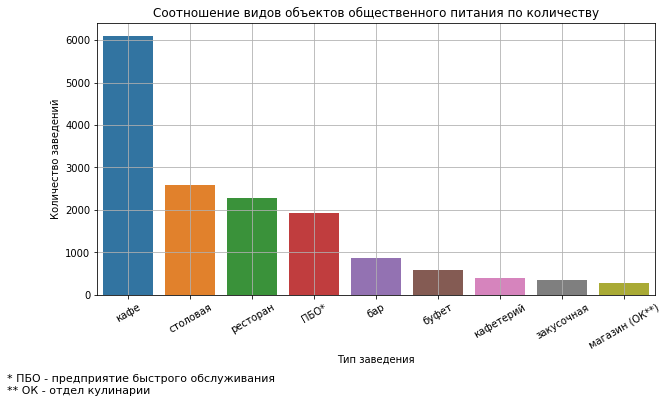

In [11]:
# график количества заведений разных типов
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='object_type', 
                 y='count', 
                 data=pivot_rest.sort_values(by='count', ascending=False))
plt.grid()
plt.xticks(rotation=30)

# сноски для презентации
plt.figtext(0, -0.15, 
            '* ПБО - предприятие быстрого обслуживания \n** ОК - отдел кулинарии',
            ha="left", fontsize=11)
plt.title('Cоотношение видов объектов общественного питания по количеству')
plt.xlabel('Тип заведения')
plt.ylabel('Количество заведений')
plt.show()

Видно, что большенство заведений общественного питания Москвы составляют кафе - больше, чем 6000 заведений. Самым редким являются отделы кулинарии в магазинах. Это неудивительно, что мало магазинов имеют такой отдел, ведь они не очень популярны среди покупателей. Такие отделы чаще всего встречают в супермаркетах и гипермаркетах.

## Количество сетевых и несетевых заведений

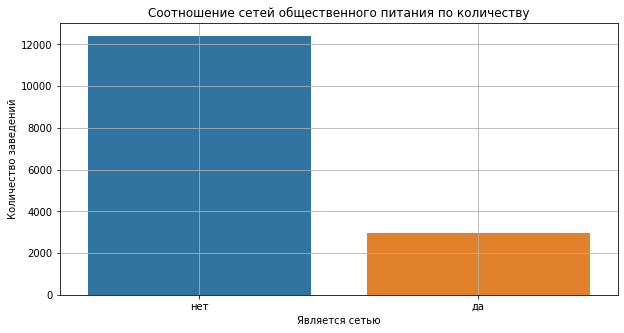

In [12]:
# график количества сетевых заведений
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='chain', 
                 y='id', 
                 data=rest_data, 
                estimator=len)
plt.grid()
plt.title('Cоотношение сетей общественного питания по количеству')
plt.xlabel('Является сетью')
plt.ylabel('Количество заведений')
plt.show()

Видно, что несетевых заведений гораздо больше, чем сетевых. Посмотрим на это отношение в разбивке по типах заведений.

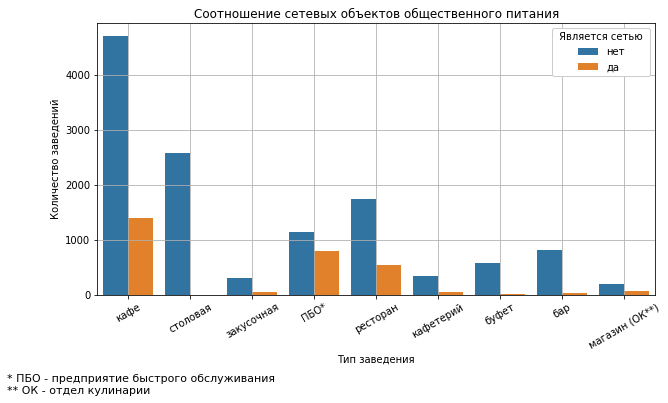

In [13]:
# груфик отношения сетевых заведений в рабивке по типам
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='object_type', 
                 y='id', 
                 data=rest_data, 
                 hue='chain',
                 estimator=len)
plt.grid()
plt.xticks(rotation=30)
plt.figtext(0, -0.15, 
            '* ПБО - предприятие быстрого обслуживания \n** ОК - отдел кулинарии',
            ha="left", fontsize=11)
plt.title('Cоотношение сетевых объектов общественного питания')
plt.xlabel('Тип заведения')
plt.ylabel('Количество заведений')
plt.legend(title=' Является сетью ', framealpha=1)
plt.show()

Видно, что у всех типов заведений несетевые - более популярны. Однако, несмотря на то, что сетевых кафе больше, чем сетевых заведений других типов, несетевых кафе в разы больше. Чего нельзя сказать о предприятиях быстрого обслуживания. Числа сетевых и несетевых заведений близки. Посмотрим на долю сетевых магазинов для каждого типа.

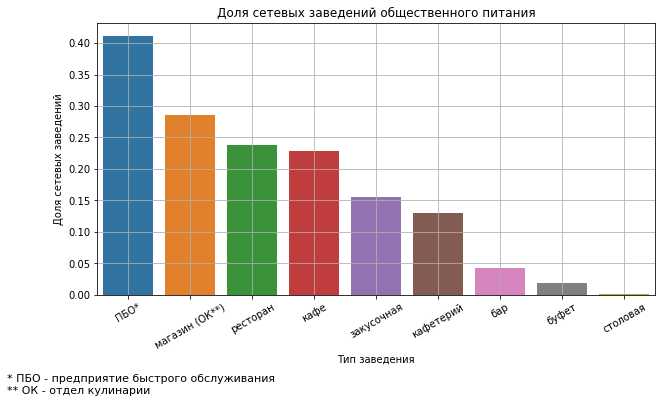

In [14]:
# график долей сетевых заведений разных типов
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='object_type', 
                 y='ratio_chain', 
                 data=pivot_rest.sort_values(by='ratio_chain', ascending=False))
plt.grid()
plt.xticks(rotation=30)
plt.figtext(0, -0.15, 
            '* ПБО - предприятие быстрого обслуживания \n** ОК - отдел кулинарии',
            ha="left", fontsize=11)
plt.title('Доля сетевых заведений общественного питания')
plt.xlabel('Тип заведения')
plt.ylabel('Доля сетевых заведений')
plt.show()

Больше 40 процентов предприятий быстрого обслуживания - сетевые. Значит наиболее популярны сетевые заведения у ПБО. А вот сетевые столовые встречаются крайне редко.

## Сетевые заведения

Посмотрим, характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.

In [15]:
# оставляем только сетевые заведения 
chain_rest = rest_data.query('is_chain == True')

In [16]:
# вспомогательная таблица с количеством заведений в сети и средним количеством мест
pivot_chain = chain_rest.groupby('object_name').agg({'id': 'count', 
                                                     'number': 'median'}).reset_index()
pivot_chain.sort_values(by='id', ascending=False, inplace=True)
pivot_chain.columns = ['object_name', 'object_number', 'avg_number']
pivot_chain.head()

,object_name,object_number,avg_number
30,KFC,155,45.0
702,Шоколадница,141,50.0
418,Макдоналдс,122,75.0
127,Бургер Кинг,122,41.5
195,Домино'с Пицца,86,16.0


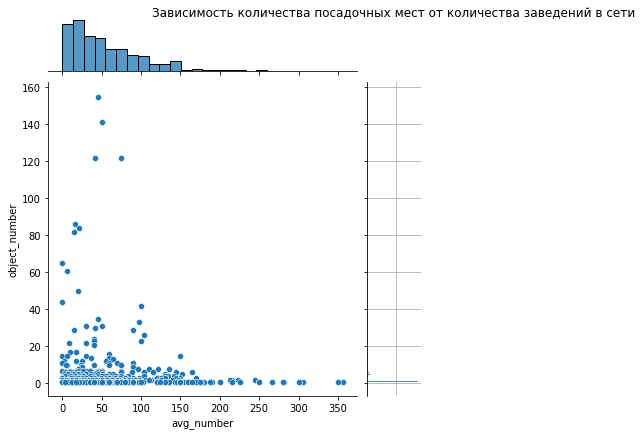

In [17]:
# точечная диаграмма и гистограммы
ax = sns.jointplot(x='avg_number', 
                 y='object_number', 
                 data=pivot_chain)
plt.grid()
plt.title('Зависимость количества посадочных мест от количества заведений в сети\n\n\n\n')
plt.xlabel('Среднее количество посадочных мест')
plt.ylabel('Количество заведений в сети')
plt.show()

По графику видно, что большинство сетей содержат не больше 5 заведений или имеют до 50 посадочных мест. Видно, что самые крупные сети имеют в среднем от 50 до 100 посадочных мест. Я бы не сказала, что это мало. Но сети, где среднее значение посадочных мест превышает 150, не имеют больше 5 заведений. 

Можно сделать вывод, что сетевым заведениям больше характерно много посадочных мест при малом количестве заведений. А мало посадочных мест существуют и в крупных и в мелких сетях. 

## Среднее количество посадочных мест

Посмотрим, какой тип заведений имеет в среднем больше всех посадочных мест.

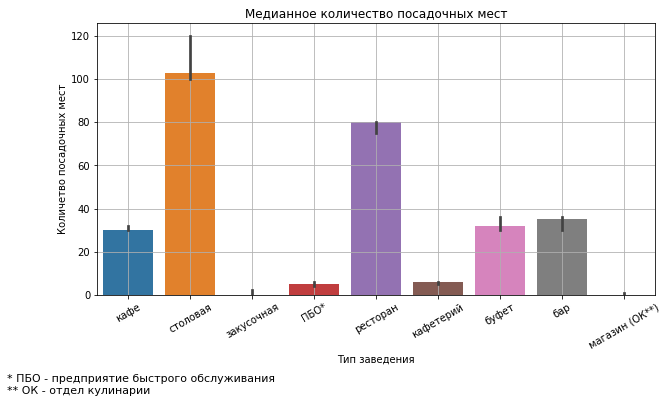

In [18]:
# график медианных значений посадочных мест
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='object_type', 
                 y='number', 
                 data=rest_data,
                 estimator=median)
plt.grid()
plt.xticks(rotation=30)
plt.figtext(0, -0.15, 
            '* ПБО - предприятие быстрого обслуживания \n** ОК - отдел кулинарии',
            ha="left", fontsize=11)
plt.title('Медианное количество посадочных мест')
plt.xlabel('Тип заведения')
plt.ylabel('Количетво посадочных мест')
plt.show()

На графике изображено именно медианное количество мест, так как эта величина более устойчива к выбросам. Видно, что в среднем больше всех мест в столовых, и это не удивительно. В столовую всегда приходит много людей, например, на обед. Еда из столовых для многих предпочтительнее по цене и вкусу чем перекусы из буфетов и кофеен. В большенстве закусочных и отделов кулинарии в магазинах часто нет посадочных мест, что и отображено на графике. Еду в таких заведениях обычно берут с собой. 

Рассмотрим каждый тип подробнее.

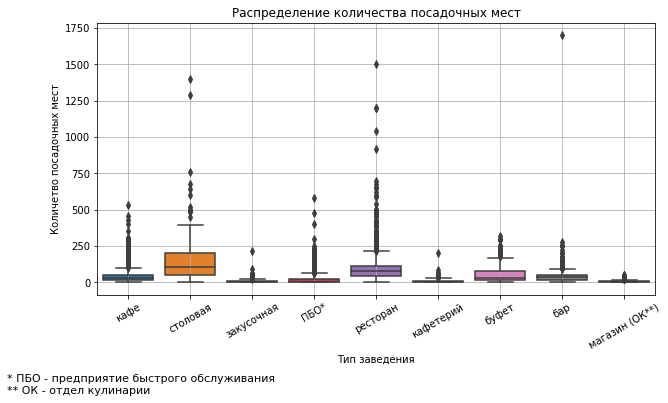

In [19]:
# распределения посадочных мест
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='object_type', 
                 y='number', 
                 data=rest_data)
plt.xticks(rotation=30)
plt.grid()
plt.figtext(0, -0.15, 
            '* ПБО - предприятие быстрого обслуживания \n** ОК - отдел кулинарии',
            ha="left", fontsize=11)
plt.title('Распределение количества посадочных мест')
plt.xlabel('Тип заведения')
plt.ylabel('Количетво посадочных мест')
plt.show()

Наблюдаются аномальные значения у многих типов заведений. Самые заметые - у столовых, баров  ресторанов - около 1500 посадочных мест. Отделы кулинарии в магазинах, кафетерии и закусочные стабильно имеют малое количество мест (там часто берут еду на вынос). На фоне других выбросы совсем незначительные. 

Насчёт разных названий заведений одной и той же сети типа "KFC" и других. У нас достаточно много заведений с одинаковыми нзываниями, чтобы судить о масштабах сети и количестве мест. Если несколько заведений из таких сетей будет потеряно из-за другого названия - это не сильно отразится на результатах. То же самое можно казать и о маленьких сетях.

## Адреса
Выделим в отдельный столбец улицу из адреса.

In [71]:
# функция для определения улицы в адресе
def get_street(address):
    split_address = address.split(', ')
    for name in split_address:
        if ('улица' in name
           or 'проспект' in name
           or 'переулок' in name
           or 'набережная' in name
           or 'шоссе' in name
           or 'проезд' in name
           or 'бульвар' in name
           or 'площадь' in name
           or 'аллея' in name
           or 'квартал' in name
           or 'линия' in name):
            return name

In [72]:
# применяем к каждому адресу функцию
rest_data['streetname'] = rest_data['address'].apply(get_street)
rest_data.head()

,id,object_name,chain,object_type,address,number,is_chain,streetname
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,False,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,False,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,False,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,True,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,False,Абрамцевская улица


In [75]:
rest_data[rest_data['streetname'].isna()]

,id,object_name,chain,object_type,address,number,is_chain,streetname
1405,20199,ЭТО,нет,кафе,"город Москва, город Зеленоград, корпус 401",35,False,None
1406,68113,Френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34,False,None
1407,20105,Кафе «Граф Монте-Кристо»,нет,кафе,"город Москва, город Зеленоград, корпус 436",40,False,None
1408,22982,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49,False,None
1409,151267,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",45,False,None
...,...,...,...,...,...,...,...,...
14998,216926,Кафе «Сахли»,нет,закусочная,"город Москва, поселение Десеновское, деревня В...",10,False,None
15015,208239,ГАЗПРОМНЕФТЬ,нет,кафе,"поселение ""Мосрентген"", деревня Дудкино, владе...",20,False,None
15137,209920,Дюшес,да,ресторан,"город Москва, город Зеленоград, Проезд № 4806,...",100,True,None
15184,220587,Пицца Паоло,да,кафетерий,"город Москва, город Зеленоград, корпус 1627",0,True,None


Возможно, в каких-то строках с адресами есть некорректная запись, например, не указан город, тогда в новый стоблец может попасть информация, например о доме. Таких строк будет совсем немного и они не повлияют на результат анализа.

## Топ-10 улиц по количеству объектов общественного питания

Определим, на каких улицах расположено больше всего объектов общественного питания и определим этот район Москвы.

In [22]:
# открываем данные о районах Москвы
area_data = pd.read_csv('https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv')
area_data.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [76]:
# количество заведений на улицах
rest_street = (rest_data
               .groupby('streetname').agg({'id': 'nunique'})
               .reset_index()
               .sort_values(by='id', ascending=False)
               .rename(columns={'id': 'count'})
)

top10 = rest_street.head(10)
top10

,streetname,count
1414,проспект Мира,204
1008,Профсоюзная улица,183
682,Ленинградский проспект,173
992,Пресненская набережная,167
396,Варшавское шоссе,165
685,Ленинский проспект,148
1410,проспект Вернадского,132
672,Кутузовский проспект,114
596,Каширское шоссе,112
603,Кировоградская улица,110


Так как некоторые из этих улиц находятся в разных районах, определим их отдельно.

In [24]:
# группируем улицы из топа по району
top10_street = top10['streetname']
(
    area_data.query('streetname in @top10_street')
    .groupby('area')
    .agg({'streetname': 'nunique'})
    .reset_index()
    .sort_values(by='streetname', ascending=False)
).head(11)

,area,streetname
30,Район Чертаново Центральное,2
2,Донской район,2
3,Ломоносовский район,2
19,Район Проспект Вернадского,2
6,Обручевский район,2
25,Район Теплый Стан,2
16,Район Нагатино-Садовники,2
31,Район Чертаново Южное,2
26,Район Тропарево-Никулино,2
11,Район Гагаринский,2


Таких районов оказалось много, чтобы определить самые популярные для заведений общественного питания районы, возьмём те, через которые проходят несколько улиц из топа. Таких районов оказалось 8 - в них проходят по две улицы из топа. 

In [79]:
area_data.query('streetname in @top10_street')['streetname'].nunique()

10

## Районы Москвы с малым количеством заведений
Определим число улиц с одним объектом общественного питания и определим в каких районах Москвы находятся эти улицы.

In [80]:
# количество улиц с одним заведением
count_1 = rest_street.query('count == 1')['streetname'].count()

Поступим также, наверняка таких районов несколько для каждой улицы, поэтому найдем сколько таких улиц и в каком районе.

In [26]:
# список улиц с одним заведением
street_1 = rest_street.query('count == 1')['streetname']
# список улиц с хотя бы одним заведением
street_total = rest_data['streetname'].unique() 

# таблица, содерщащая информаци о районах, что есть улицы с одним заведением
# streetname_1_count - количество улиц с 1 заведением
# streetname_total_count 
msc_areas = (
    area_data.query('streetname in @street_1')
    .groupby('area')
    .agg({'streetname': 'nunique'})
    .reset_index()
    .sort_values(by='streetname', ascending=False)
).merge(
    area_data.query('streetname in @street_total')
    .groupby('area')
    .agg({'streetname': 'nunique'})
    .reset_index(),
    on='area',
    suffixes=['_1_count', '_total_count']
)
msc_areas.head()

,area,streetname_1_count,streetname_total_count
0,Таганский район,27,81
1,Район Хамовники,26,74
2,Басманный район,25,80
3,Тверской район,20,106
4,Пресненский район,19,87


Думаю, для инвесторов ничего не сказала бы таблица просто с количеством улиц с одним заведением в районе. Поскольку не понятно, сколько всего улиц в районе, на скольких из них есть заведения, сколько их там вообще? Две улицы с одним заведением в районе хорошо для открытия новых мест, если это единственные улицы в районе, а если на других улицах заведения есть и их в разы больше? 

Посмотрим на долю таких улиц из всех улиц с заведениями.

In [27]:
# считаем долю улиц с одним заведением
msc_areas['ratio'] = msc_areas['streetname_1_count'] / msc_areas['streetname_total_count'] * 100
msc_areas.sort_values(by='streetname_1_count', ascending=False).head()

,area,streetname_1_count,streetname_total_count,ratio
0,Таганский район,27,81,33.333333
1,Район Хамовники,26,74,35.135135
2,Басманный район,25,80,31.250000
3,Тверской район,20,106,18.867925
4,Пресненский район,19,87,21.839080


In [28]:
msc_areas.sort_values(by='ratio', ascending=False).head()

,area,streetname_1_count,streetname_total_count,ratio
75,Район Восточный,2,3,66.666667
5,Район Марьина роща,18,35,51.428571
15,Район Богородское,10,21,47.619048
16,Нижегородский район,9,19,47.368421
32,Район Солнцево,6,13,46.153846


Например, в районе Восточный всего три улицы с объектами общественного питания, и на двух из них - всего по одному заведению. А вот в Тверском районе только 20 из 106 улиц имеют 1 заведение - остальные больше.

In [84]:
area_data.query('streetname in @street_1')['streetname'].nunique(), count_1

(517, 543)

In [86]:
area_data.query('streetname in @street_total')['streetname'].nunique(), rest_data['streetname'].nunique() 

(1777, 1893)

## Распределение количества посадочных мест

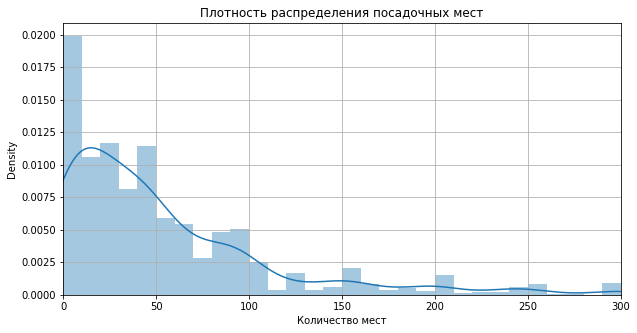

In [29]:
# график плотности распределения посадочных мест
plt.figure(figsize=(10, 5))
ax = sns.distplot(rest_data.query('streetname in @top10_street and number <=300')['number'],
                 bins=30)
plt.grid()
plt.title('Плотность распределения посадочных мест')
plt.xlabel('Количество мест')
plt.xlim(0, 300)
plt.show()

По графику видно, что на популярных улицах чаще всего встречаются места c количеством мест до 10. После 300 мест существует несколько аномально больших заведений. Можно сказать, что заведения с количеством мест больше 100 - не самые часто встречающиеся на этих улицах. Посмотрим, как распределены места в разбивке по улицам.

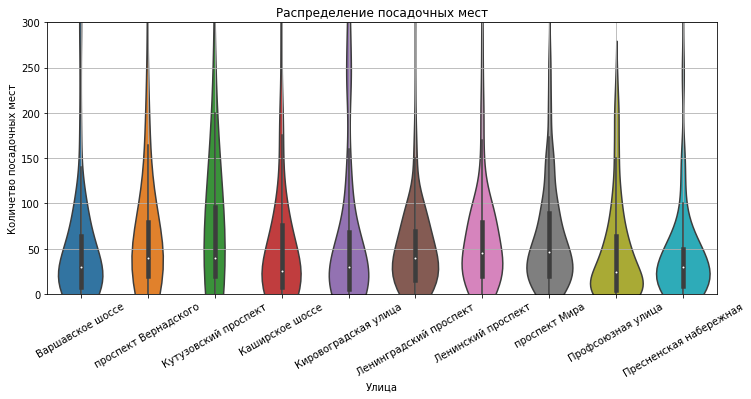

In [30]:
top_data = rest_data.query('streetname in @top10_street')
plt.figure(figsize=(12, 5))
ax = sns.violinplot(x='streetname',
                    y='number',
                   data=top_data)
plt.grid()

plt.xticks(rotation=30)
plt.title('Распределение посадочных мест')
plt.xlabel('Улица')
plt.ylim(0, 300)
plt.ylabel('Количетво посадочных мест')
plt.show()

Самое большое медианное значение посадочных мест на проспекте Мира и на Ленинском проспекте - почти 50 мест. На Кутузовском проспекте самый большой разброс количества мест. А вот на Каширском шоссе медианное значение меньше остальных, скорее всего там много заведений с едой на вынос.  

## Вывод

Надо знать что интересует инвесторов: популярный район для заведений или район, где будет в принципе маленькая конкуренция.

Дело в том, что чем больше заведений открывают на улице, чем вероянее, что в этом большая потребность, то есть на улице большая проходимость. То есть, например, на проспекте Мира есть очень много заведений, значит народ туда приезжает и живёт там большое количество заинтересованных людей. А вдруг большинство из них открыты, но пустуют большую часть времени? Тогда надо открывать в том районе, где спрос большой, но заведений мало. Сложно давать рекомендации, когда не понятно, что для инвесторов важно. Но могу сказать о популярных и не популярных типах заведений и районах. 

**Тип заведения**
*Самый популярный:* кафе. Кафе составляют почти 40 процентов всех объектов общественного питания. популярны как сетевые, так и не сетевые заведения. 
*Самый непопулярный*: отделы общественного питания и закусочные. В основном люди там берут еду с собой, поэтому у таких заведениях нет растрат на посадочные места. Вопрос к инвесторам: проект дорогой, значит для начала нужно будет протестировать заведение? Возможно, стоит проверить, как роботы будут обслуживать клиентов, которые пришли не на долго и хотят просто забрать еду с собой? 

**Район расположения**
*Самый популярный*: Тверской, на нем 104 улицы с заведениями, и лишь 20 из них всего с одним местом общественного питания. Но больший процент таких улиц в Таганском районе: 81 улица с заведениями, из них 27 улиц с 1 заведением. То есть этот район популярен для объектов общественного питания, но при этом много улиц с всего лишь одним местом. На таких улицах и стоит открывать заведение: и район популярный, и на улице не много конкурентов. 
*Самый непопулярный*: Восточный - 3 улицы с заведениями, из них на двух улицах по одному. Но если спрос на эти места высокий, но заведение с роботами сможет разгрузить это и стать популярным. Только вот из других районов туда поедут с меньшей вероятностью, чем в Тверской.

**Количество посадочных мест** 
*Оптимальный вариант:* до 25 мест. Если открыть больше - велика вероятность, что в первое время они действительно будут заполнены, а вот позже, когда люди немного потеряют интерес, будут пустовать. Самое большое количество мест обычно у столовых, потому что туда люди приходят просто поесть, им не важно, какая оригинальная идея у заведения и так далее. В обед люди предпочтут столовую, значит много мест и не надо. Можно открыть еду навынос, но тогда и робот понадобится всего один, и площадь можно выбирать небольшую, но зато люди поймут, что роботам можно доверять и тогда они с большей вероятностью потом пойдут в кафе с роботами. 

# Презентация

Презентация: <https://disk.yandex.ru/i/33bSamxROcOIaw>